[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/master/Tema_2_AnalisisEstadistico/notebook/3_MC_Estacionario_ejemplos.ipynb)

## Resumen Monte Carlo

La simulación Monte Carlo **estima la probabilidad de ocurrencia de un evento *indeterminable* debido a la participación de variables aleatorias**. 

El algoritmo se basa en el muestreo aleatorio repetido en un intento de, justamente, determinar la probabilidad. 

Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación. 

---

El análisis de riesgos es parte de cualquier toma de decisiones, debido a que constantemente nos enfrentamos a la **incertidumbre**, **ambigüedad**, y **variabilidad** en nuestras vidas. 

Simplemente nos permite visualizar todas las posibilidades de nuestras decisiones (primer orden) y considerar el riesgo de cada una de ellas, con la finalidad de reducir la incertidumbre (segundo orden) de que suceda dicho evento. 

## Ejemplos

### 1.- Lanzamiento de una moneda: La probabilidad de obtener alguna de las caras es 1/2. 

    Podemos usar Monte Carlo para simular el lanzamiento de una moneda iterativamente 50, 500, 5000 veces para averiguar por qué la probabilidad de que salga cara o cruz siempre es 1/2. 

![img](https://miro.medium.com/max/594/0*iGpqyYv8W4zk5aWv.png)

    Si repetimos este lanzamiento de moneda muchas, muchas más veces, entonces podemos lograr una mayor precisión en una respuesta exacta para nuestro valor de probabilidad.

#### Código lanzamiento monedas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def coin_flip():
    return random.randint(0,1)

In [2]:
for i in range(5):
    print(coin_flip())

1
0
1
1
1


In [3]:
# Simulación Monte Carlo
def mc(n):
    list1 = []
    res = 0
    for i in range(n):
        flip = coin_flip()
        res = res + flip
        
        #calculando probabilidad
        prob = res/(i+1)
        
        #agregar probabilidades a la lista
        list1.append(prob)
        
        #Graficacion
        plt.axhline(y=0.5, color='b', linestyle='-')
        plt.xlabel("iteraciones")
        plt.ylabel("probabilidad")
        plt.plot(list1)
    return res/n

valor final 0.462


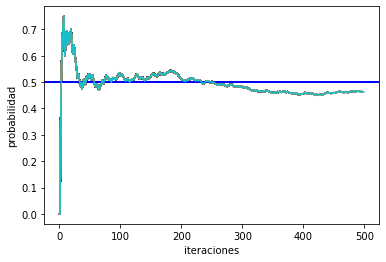

In [4]:
respuesta = mc(500)
print("valor final", respuesta)

## 2.- Estimando Pi usando un circulo y un cuadrado

![img](https://miro.medium.com/max/712/0*e7yxp4Uha92yU94q.png)
![img](https://miro.medium.com/max/518/0*YGncv3ENT_gOEJOv.png)

Para estimar el valor de PI, necesitamos el área del cuadrado y el área del círculo. Para encontrar estas áreas, colocaremos puntos al azar en la superficie y contaremos los puntos que caen dentro del círculo y los puntos que caen dentro del cuadrado. Esto nos dará una cantidad estimada de sus áreas. Por lo tanto, en lugar de usar las áreas reales, usaremos la cuenta de puntos para usar como áreas.

#### Código valor de PI

In [5]:
import math
import turtle
import numpy as np
import random 
import matplotlib.pyplot as plt

in_val = 0
out_val = 0
pi_val = []

### Ejecute el siguiente código de forma local para visualizar la animación y obtener el resultado. En colab no funciona.

test = turtle.Turtle()
test.hideturtle()
test.speed(10)

test.up()
test.setposition(-100,-100)
test.down()
test.fd(200)
test.left(90)
test.fd(200)

test.left(90)
test.fd(200)
test.left(90)
test.fd(200)
test.left(90)

test.up()
test.setposition(0,-100)
test.down()
test.circle(100)

for i in range(2):
    for j in range(50):
        
        x=random.randrange(-100,100)
        y=random.randrange(-100,100)
        
        if(x**2+y**2>100**2):
            test.color("black")
            test.up()
            test.goto(x,y)
            test.down()
            test.dot()
            out_val = out_val+1
            
        else:
            test.color("red")
            test.up()
            test.goto(x,y)
            test.down()
            test.dot()
            in_val = in_val+1
        
        #calculando valor de pi
        pi = 4.0*in_val / (in_val + out_val)
        #agregando valores a lista
        pi_val.append(pi)
        
        #calculando errores
        avg = [abs(math.pi - pi) for pi in pi_val]
    
    print(pi_val[-1])
    print(avg)

    #Graficacion
    plt.axhline(y=math.pi, color='g', linestyle='-')
    plt.xlabel("iteraciones")
    plt.ylabel("valor de pi")
    plt.plot(pi_val)
    plt.show()
    
    #Graficacion
    plt.axhline(y=0.0, color='g', linestyle='-')
    plt.xlabel("iteraciones")
    plt.ylabel("error")
    plt.plot(avg)
    plt.show()

3.0
0.14159265358979312


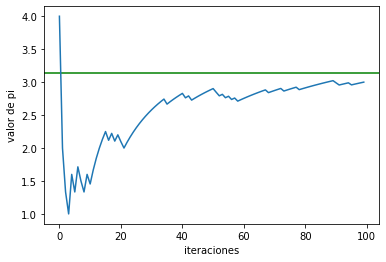

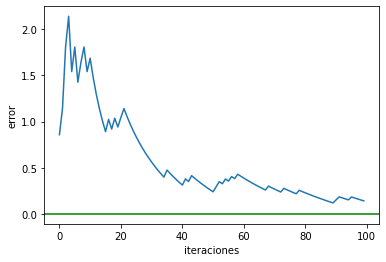

3.08
0.061592653589793045


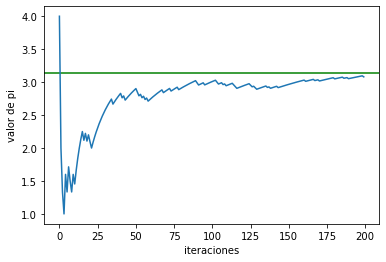

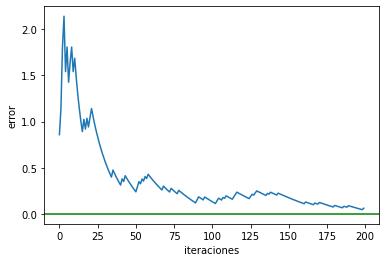

3.12
0.02159265358979301


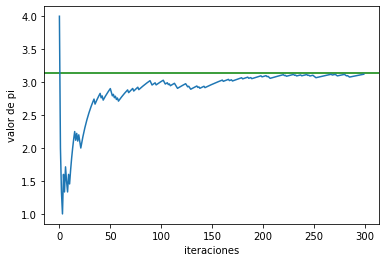

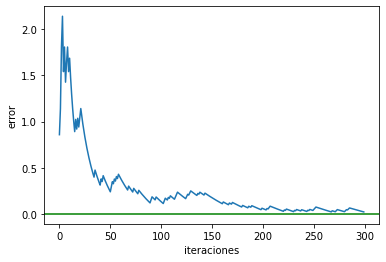

3.0
0.14159265358979312


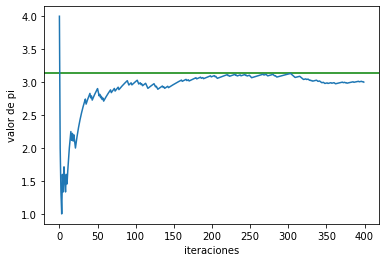

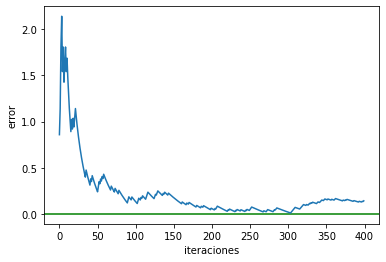

3.064
0.07759265358979306


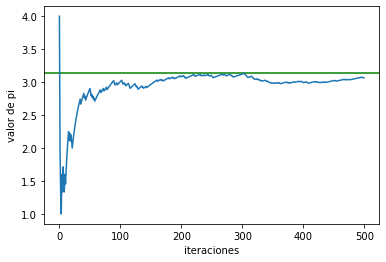

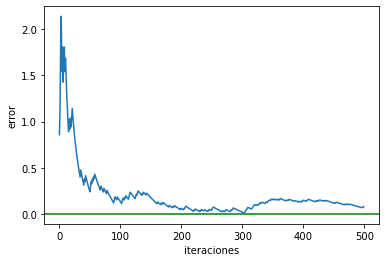

In [31]:
in_val = 0
out_val = 0
pi_val = []

for i in range(5):
    for j in range(100):
        
        x=random.randrange(-100,100)
        y=random.randrange(-100,100)
        
        if(x**2+y**2>100**2):
            out_val = out_val+1
            
        else:
            in_val = in_val+1
        
        #calculando valor de pi
        pi = 4.0*in_val / (in_val + out_val)
        #agregando valores a lista
        pi_val.append(pi)
        
        #calculando errores
        avg = [abs(math.pi - pi) for pi in pi_val]
    
    print(pi_val[-1])
    print(avg[-1])

    #Graficacion
    plt.axhline(y=math.pi, color='g', linestyle='-')
    plt.xlabel("iteraciones")
    plt.ylabel("valor de pi")
    plt.plot(pi_val)
    plt.show()
    
    #Graficacion
    plt.axhline(y=0.0, color='g', linestyle='-')
    plt.xlabel("iteraciones")
    plt.ylabel("error")
    plt.plot(avg)
    plt.show()

## 3.- La catafixia


Supongamos estar en un programa de juegos y debemos elegir una de tres puertas: detrás de una puerta hay un automóvil; detrás de las otras puertas, cabras. Eliges una puerta, digamos la puerta 1, y el anfitrión, que sabe lo que hay detrás de las puertas, abre otra puerta, digamos la puerta 3, que tiene una cabra. Luego, el anfitrión le pregunta: ¿quiere seguir con su elección o elegir otra puerta?

![img](https://miro.medium.com/max/1400/0*ovOex55tldMX3WEI.png)

Veremos por qué es más ventajoso cambiar la puerta:
    
![img](https://miro.medium.com/max/1400/0*bHbVj17ckJHzoUai.png)

Podemos ver que después de que el anfitrión abre la puerta 3, la probabilidad de que las dos últimas puertas tengan un automóvil aumenta a 2/3. Ahora que sabemos que la tercera puerta tiene una cabra, la probabilidad de que la segunda puerta tenga un automóvil aumenta a 2/3. Por lo tanto, es más ventajoso cambiar las puertas.

Ahora vamos a usar el método de Monte Carlo para realizar este caso de prueba muchas veces y averiguar sus probabilidades de forma experimental.

#### Codigo de catafixia

In [7]:
import random
import matplotlib.pyplot as plt

puertas = ["cabra", "cabra", "coche"]

switch_win_prob = []
stick_win_prob = []

In [8]:
def montecarlo(n):
    switch_wins = 0
    stick_wins = 0
    
    for i in range(n):
        
        random.shuffle(puertas)
        k = random.randrange(2)
        
        if puertas[k] != 'coche':
            switch_wins+=1
        else:
            stick_wins+=1
            
        switch_win_prob.append(switch_wins/(i+1))
        stick_win_prob.append(stick_wins/(i+1))
        
        plt.plot(switch_win_prob)
        plt.plot(stick_win_prob)
        plt.axhline(y=0.66666, color="r", linestyle="-")
        plt.axhline(y=0.33333, color="g", linestyle="-")
    
    print("Probabilidad de ganar si cambiamos", switch_win_prob[-1])
    print("Probabilidad de ganar si no cambiamos", stick_win_prob[-1])

Probabilidad de ganar si cambiamos 0.639
Probabilidad de ganar si no cambiamos 0.361


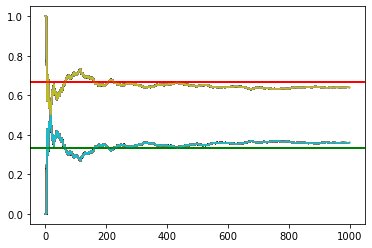

In [9]:
montecarlo(1000)

---
---


# Reto!!

### ¿Por qué la casa siempre gana?

¿Cómo ganan dinero los casinos? El truco es sencillo: "Cuanto más juegas, más ganan". Echemos un vistazo a cómo funciona esto con un ejemplo simple de simulación de Monte Carlo.

Considere un juego imaginario en el que un jugador tiene que elegir una ficha de una bolsa de fichas.

#### Reglas:

   * Hay fichas que contienen números que van del 1 al 100 en una bolsa.
   * Los usuarios pueden apostar en fichas pares o impares.
   * En este juego, el 10 y el 11 son números especiales. Si apostamos a pares, el 10 se contará como un número impar, y si apostamos a las probabilidades, el 11 se contará como un número par.
   * Si apostamos a números pares y nos sale 10 entonces perdemos.
   * Si apostamos a números impares y nos sale 11 entonces perdemos.
   * El jugador comienza con 10000, apuesa de 100 en 100 y apostará para n-cantidad de veces

In [10]:
import random
import matplotlib.pyplot as plt

In [11]:
#El usuario elige opcion de par o impar
choice = input("Apostar por Par o Impar \n")

#Reglas par
if choice == "Par":
    def pickNote():
        #Generar un valor aleatorio de 1 a 100
        note = random.randint(1,100)

        #Recordemos las reglas del juego, el 10 se considera impar
        if note%2!=0 or note == 10:
            return False
        elif note%2==0:
            return True
    
#Reglas impar
elif choice == "Impar":
    def pickNote():
        #Generar un valor aleatorio de 1 a 100
        note = random.randint(1,100)

        #Recordemos las reglas del juego, el 10 se considera impar
        if note%2==0 or note == 11:
            return False
        elif note%2==1:
            return True

Apostar por Par o Impar 
Par


In [12]:
def play(total_money, bet_money, total_plays):

    num_of_plays = []
    money = []
    play = 1

    for play in range(total_plays):
        #Victoria
        if pickNote():
            #Sumar lo ganado
            total_money = total_money + bet_money
            #agregar valores al arreglo de veces jugadas
            num_of_plays.append(play)
            #agregar lo ganado
            money.append(total_money)

        #Perdida
        else:
            #restar lo perdido
            total_money = total_money - bet_money
            #agregar valores al arreglo de veces jugadas
            num_of_plays.append(play)
            #agregar lo ganado
            money.append(total_money)

         
    #Graficar
    plt.ylabel("Player Money")
    plt.xlabel("Number of bets")
    plt.plot(num_of_plays, money)

    #Monto final
    final_funds.append(money[-1])
    return(final_funds)

[8600, 9600, 10000, 10600, 9800, 8400, 10200, 9800, 8800, 10600, 10000, 9400, 9600, 10400, 9200, 10200, 10200, 10800, 10200, 10000, 10200, 8200, 11400, 10000, 10200, 10000, 9600, 9400, 9800, 11000]
296200
El jugador comenzo con 10,000
El jugador se fue con  9873.333333333334


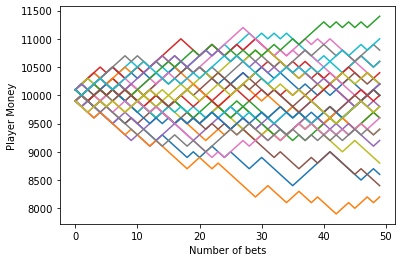

In [13]:
final_funds = []

for i in range(30):
    ending_fund = play(10000,100,50)

print(ending_fund)
print(sum(ending_fund))

print("El jugador comenzo con 10,000")
print("El jugador se fue con ", str(sum(ending_fund)/len(ending_fund)))

#### Muestra la la cantidad de eventos que están por arriba del dinero inicial y aquellos por debajo

9888.88 698.6875879819248


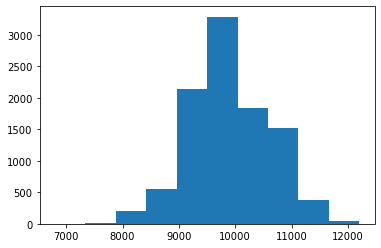

In [26]:
plt.hist(final_funds)
print(np.mean(final_funds), np.std(final_funds))


Obtengamos lo mismo, pero ahora para 5, 10, 1000, 5000 y 10000 apuestas

El jugador comenzo con 10,000
El jugador se fue con  10360.0


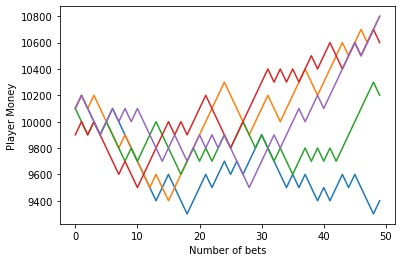

In [15]:
final_funds = []

for i in range(5):
    ending_fund = play(10000,100,50)

print("El jugador comenzo con 10,000")
print("El jugador se fue con ", str(sum(ending_fund)/len(ending_fund)))


(array([1., 0., 0., 0., 0., 1., 0., 0., 1., 2.]),
 array([ 9400.,  9540.,  9680.,  9820.,  9960., 10100., 10240., 10380.,
        10520., 10660., 10800.]),
 <BarContainer object of 10 artists>)

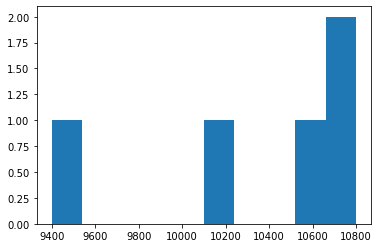

In [16]:
plt.hist(final_funds)

El jugador comenzo con 10,000
El jugador se fue con  -12940.0


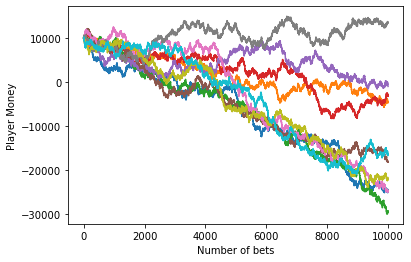

In [27]:
final_funds = []

for i in range(10):
    ending_fund = play(10000,100,10000)

print("El jugador comenzo con 10,000")
print("El jugador se fue con ", str(sum(ending_fund)/len(ending_fund)))

(array([4., 1., 1., 0., 2., 1., 0., 0., 0., 1.]),
 array([ 9800.,  9940., 10080., 10220., 10360., 10500., 10640., 10780.,
        10920., 11060., 11200.]),
 <BarContainer object of 10 artists>)

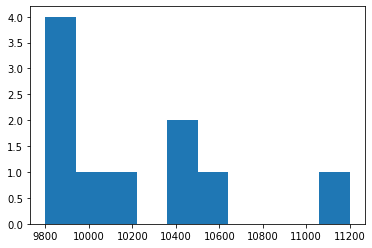

In [18]:
plt.hist(final_funds)

El jugador comenzo con 10,000
El jugador se fue con  9887.6


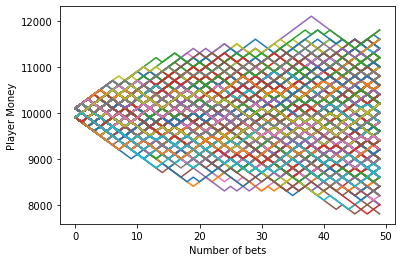

In [19]:
final_funds = []

for i in range(1000):
    ending_fund = play(10000,100,50)

print("El jugador comenzo con 10,000")
print("El jugador se fue con ", str(sum(ending_fund)/len(ending_fund)))

(array([  6.,  23.,  49., 117., 212., 213., 172., 129.,  56.,  23.]),
 array([ 7800.,  8200.,  8600.,  9000.,  9400.,  9800., 10200., 10600.,
        11000., 11400., 11800.]),
 <BarContainer object of 10 artists>)

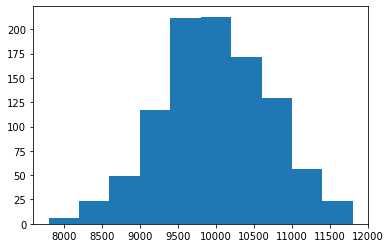

In [20]:
plt.hist(final_funds)

El jugador comenzo con 10,000
El jugador se fue con  -65400.0


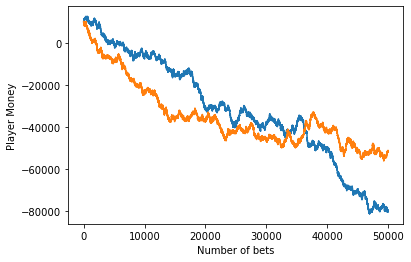

In [30]:
final_funds = []

for i in range(2):
    ending_fund = play(10000,100,50000)

print("El jugador comenzo con 10,000")
print("El jugador se fue con ", str(sum(ending_fund)/len(ending_fund)))

(array([  11.,   45.,  322.,  586., 1562., 1028., 1055.,  282.,   94.,
          15.]),
 array([ 7400.,  7900.,  8400.,  8900.,  9400.,  9900., 10400., 10900.,
        11400., 11900., 12400.]),
 <BarContainer object of 10 artists>)

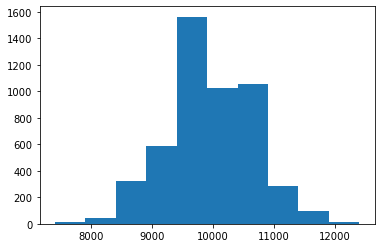

In [22]:
plt.hist(final_funds)

El jugador comenzo con 10,000
El jugador se fue con  9888.88


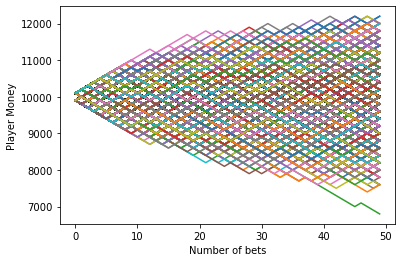

In [23]:
final_funds = []

for i in range(10000):
    ending_fund = play(10000,100,50)

print("El jugador comenzo con 10,000")
print("El jugador se fue con ", str(sum(ending_fund)/len(ending_fund)))

(array([1.000e+00, 1.300e+01, 2.030e+02, 5.540e+02, 2.149e+03, 3.291e+03,
        1.846e+03, 1.524e+03, 3.710e+02, 4.800e+01]),
 array([ 6800.,  7340.,  7880.,  8420.,  8960.,  9500., 10040., 10580.,
        11120., 11660., 12200.]),
 <BarContainer object of 10 artists>)

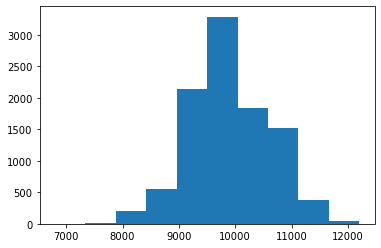

In [24]:
plt.hist(final_funds)

¿Qué podemos inferir de lo anterior?¿Hay beneficios dependiendo la cantidad de las apuestas hechas por el jugador?

<font color="red">Posiblemente para pocas apuestas, se perciba un beneficio a favor del jugador, pero en el caso de incrementar la cantidad de apuestas, la distribución de los resultados termina favoreciendo a la casa</font>

### Conclusión:

Al igual que con cualquier modelo de pronóstico, la simulación solo será tan buena como las estimaciones que hagamos. Es importante recordar que la Simulación Monte Carlo solo representa probabilidades y no certeza. No obstante, la simulación de Monte Carlo puede ser una herramienta valiosa al pronosticar un futuro desconocido.

